# **Telecom X Parte 2**

**Autor:**  Jesus Armando Tapia Gallegos

**Fecha:**  6 de febrero, 2026

## **Predicción de Cancelación de Clientes**

En este notebook se desarrolla la segunda parte del Challenge Telecom X, enfocada en la construcción de modelos predictivos para anticipar la cancelación de clientes *(churn)*, a partir de los datos previamente tratados en la Parte 1 del proyecto.

# Objetivo

El objetivo de este proyecto es construir y evaluar modelos predictivos que permitan identificar clientes con alto riesgo de cancelación *(churn)* en Telecom X, apoyando decisiones estratégicas de retención.

Este análisis permitirá priorizar acciones de retención basadas en variables con mayor influencia en la cancelación

## 1. Introducción


### 1.1 Contexto del desafío

En la primera parte del [Challenge Telecom X ](https://github.com/atapia9/TXDII)se realizó un proceso de extracción, limpieza y análisis exploratorio de los datos de clientes, con el objetivo de comprender los patrones asociados a la cancelación del servicio.

Tras completar dicha etapa, el presente análisis corresponde a la segunda fase del desafío, en la cual el enfoque se desplaza del análisis descriptivo hacia la construcción de modelos predictivos que permitan anticipar qué clientes presentan mayor probabilidad de cancelar sus servicios.


### 1.2 Objetivo del análisis

El objetivo principal de este análisis es desarrollar y evaluar modelos de clasificación capaces de predecir la cancelación de clientes (churn), utilizando variables relevantes del comportamiento y características de los usuarios de Telecom X.

Adicionalmente, se busca interpretar los resultados de los modelos para identificar los factores que más influyen en la cancelación, con el fin de generar conclusiones y recomendaciones estratégicas que apoyen la toma de decisiones del negocio.


### 1.3 Continuidad con la Parte 1

Para garantizar la consistencia del análisis, en esta segunda parte del desafío se utiliza exclusivamente el conjunto de datos tratado en la [Parte 1 del proyecto.](https://colab.research.google.com/github/atapia9/TXDII/blob/main/JATG_telecomx_etl_eda.ipynb/)

Dicho dataset fue previamente limpiado, estandarizado y validado, y se carga en este notebook en formato CSV, evitando repetir procesos de ETL y asegurando la trazabilidad de las decisiones analíticas a lo largo de todo el proyecto.



El análisis se desarrolla bajo un enfoque CRISP-DM adaptado, cubriendo las fases de comprensión del negocio, comprensión de los datos, preparación de datos y análisis exploratorio, dejando el modelado predictivo para la siguiente sección.

En esta etapa no se construyen modelos predictivos; el foco está en asegurar calidad, coherencia y viabilidad del dataset para maximizar el desempeño de los modelos posteriores.

## 2. Carga y comprensión de los datos


### 2.1 Carga del dataset tratado

En esta sección se carga el conjunto de datos previamente tratado en la Parte 1 del Challenge Telecom X, el cual contiene información consolidada y estandarizada sobre los clientes de la empresa.

El dataset se utiliza como punto de partida para el desarrollo de los modelos predictivos, garantizando la continuidad del análisis y evitando la duplicación de procesos de limpieza y transformación.


***Carga del dataset***

In [84]:
import  pandas as pd
url = "https://raw.githubusercontent.com/atapia9/TXP2O/main/datos_tratados.csv"

try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully.")
    # Convert 'Churn' to numeric (0 and 1) immediately after loading
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    df.head()
except Exception as e:
    raise RuntimeError("No se pudo cargar el dataset. Verifica la URL del repositorio o el formato del archivo.") from e

Dataset loaded successfully.


***Verificación básica de estructura***

In [85]:
# Dimensión del dataset
df.shape


(7043, 22)

***Información general del dataset***

In [86]:
# Información general de las variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


***Verificación rápida de valores faltantes***

In [87]:
# Revisión de valores faltantes por columna
df.isna().sum()


,0
CustomerID,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### 2.2 Dimensión y estructura del dataset

Una vez cargados los datos, se revisa la dimensión del dataset y la estructura general de sus variables, con el fin de comprender el tamaño de la muestra y el tipo de información disponible.

Este paso permite identificar el número de registros y columnas, así como los tipos de datos presentes, lo cual es fundamental para definir las etapas posteriores de preparación y modelado.


***Dimensión del dataset***

In [88]:
# Número de filas y columnas
df.shape


(7043, 22)

***Listado de columnas***

In [89]:
# Nombres de las columnas
df.columns


Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'ChargesDaily', 'ChargesMonthly',
       'ChargesTotal'],
      dtype='object')

***Tipos de datos por columna***

In [90]:
# Tipos de datos de cada variable
df.dtypes


,0
CustomerID,object
Churn,int64
Gender,object
SeniorCitizen,object
Partner,object
Dependents,object
Tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


***Resumen estadístico general***

In [91]:
# Estadísticas descriptivas de variables numéricas
df.describe()


,Churn,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,32.371149,2.158675,64.761692,2279.734304
std,0.441561,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.000000,0.610000,18.250000,0.000000
25%,0.000000,9.000000,1.180000,35.500000,398.550000
50%,0.000000,29.000000,2.340000,70.350000,1394.550000
75%,1.000000,55.000000,2.990000,89.850000,3786.600000
max,1.000000,72.000000,3.960000,118.750000,8684.800000


***Resumen extendido (incluye categóricas)***

In [92]:
# Estadísticas descriptivas incluyendo variables no numéricas
df.describe(include="all")


,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
count,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,2,2,2,2,NaN,2,2,3,...,2,2,2,2,3,2,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,1,NaN,3555,5901,3641,4933,NaN,6361,4072,3096,...,4621,4999,4336,4311,3875,4171,2365,NaN,NaN,NaN
mean,NaN,0.265370,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.158675,64.761692,2279.734304
std,NaN,0.441561,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.003088,30.090047,2266.794470
min,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610000,18.250000,0.000000
25%,NaN,0.000000,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.180000,35.500000,398.550000
50%,NaN,0.000000,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.340000,70.350000,1394.550000
75%,NaN,1.000000,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.990000,89.850000,3786.600000


### 2.3 Identificación de la variable objetivo

En este conjunto de datos, la variable objetivo corresponde a la cancelación del servicio por parte de los clientes (churn), la cual indica si un cliente ha cancelado o no su contrato con Telecom X.

La correcta identificación de esta variable es esencial, ya que a partir de ella se definirán las tareas de clasificación, las métricas de evaluación y la interpretación de los resultados obtenidos por los modelos predictivos.


***Verificación de existencia de la variable objetivo***

In [93]:
# Verificar que la variable objetivo exista en el dataset
"churn" in df.columns


False

***Exploración básica de la variable objetivo***

In [94]:
# Visualizar valores únicos de la variable objetivo
df["Churn"].unique()


array([0, 1])

***Tipo de dato de la variable objetivo***

In [95]:
# Tipo de dato de la variable objetivo
df["Churn"].dtype


dtype('int64')

***Conteo simple de observaciones por clase***

In [96]:
# Conteo absoluto de cada clase
df["Churn"].value_counts()


,count
Churn,
0,5174
1,1869


***Conteo proporcional (opcional, descriptivo)***

In [97]:
# Proporción de cada clase
df["Churn"].value_counts(normalize=True)


,proportion
Churn,
0,0.73463
1,0.26537


**El dataset contiene 7043 observaciones y 4 variables, de las cuales 18 son numéricas y 5 categóricas.**

**La variable objetivo es Churn, de naturaleza binaria.**

## 3. Preparación de los datos para modelado


### 3.1 Eliminación de columnas irrelevantes


En esta etapa se eliminan aquellas columnas que no aportan valor predictivo al modelo de machine learning, como identificadores únicos u otras variables que no contienen información útil para la predicción de la cancelación de clientes.

Este paso es fundamental para reducir ruido, evitar posibles problemas de sobreajuste y garantizar que los modelos se entrenen únicamente con variables relevantes.


**Se eliminan columnas irrelevantes para evitar ruido en el análisis de correlación y modelos posteriores.**

***Revisión inicial de columnas***

In [98]:
# Visualizar las columnas disponibles antes de la depuración
df.columns


Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'ChargesDaily', 'ChargesMonthly',
       'ChargesTotal'],
      dtype='object')

***Identificación de columnas irrelevantes***

Las variables eliminadas no aportan información predictiva directa o presentan alta cardinalidad sin relación causal con churn, lo que podría introducir ruido en el modelado

In [99]:
# Columna(s) identificada(s) como irrelevante(s) para el modelado
columnas_irrelevantes = ["customerid"]

columnas_irrelevantes


['customerid']

***Eliminación de columnas irrelevantes***

In [100]:
df = df.drop(columns=['CustomerID'])

***Verificación posterior a la eliminación***

In [101]:
# Verificar columnas restantes después de la depuración
df.columns


Index(['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'ChargesDaily', 'ChargesMonthly', 'ChargesTotal'],
      dtype='object')

***Dimensión del dataset tras la eliminación***

In [102]:
# Dimensión del dataset después de eliminar columnas irrelevantes
df.shape


(7043, 21)

### 3.2 Tratamiento de valores faltantes


En esta sección se identifican y tratan los valores faltantes presentes en el conjunto de datos. El objetivo es asegurar la consistencia del dataset antes de aplicar técnicas de modelado, evitando errores durante el entrenamiento de los modelos y garantizando resultados confiables.

Las decisiones tomadas en este paso buscan equilibrar la integridad de la información con la mínima


***Identificación de valores faltantes***

In [103]:
# Identificar valores faltantes por columna
df.isna().sum()


,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


***Filas con valores faltantes***

In [104]:
# Visualizar filas que contienen valores faltantes
df[df.isna().any(axis=1)]


,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal


***Conteo de filas con valores faltantes***

In [105]:
# Número total de filas con al menos un valor faltante
df.isna().any(axis=1).sum()


np.int64(0)

***Eliminación de filas con valores faltantes***

In [106]:
# Eliminación de filas con valores faltantes
df = df.dropna()


***Verificación posterior al tratamiento***

In [107]:
# Verificar que no existan valores faltantes
df.isna().sum()


,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


***Dimensión final del dataset***

In [108]:
# Dimensión del dataset después del tratamiento de valores faltantes
df.shape


(7043, 21)

### 3.3 Clasificación de variables
- Variables numéricas  
- Variables categóricas  
- Variables binarias  


En esta sección se clasifican las variables del dataset según su naturaleza (numéricas, categóricas y binarias). Esta organización es fundamental para definir las transformaciones que se aplicarán posteriormente, como la codificación de variables categóricas o la normalización de variables numéricas.


***Identificación de variables por tipo de dato***

In [109]:
# Identificar variables por tipo de dato
variables_numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
variables_categoricas = df.select_dtypes(include=["object"]).columns.tolist()

variables_numericas, variables_categoricas


(['Churn', 'Tenure', 'ChargesDaily', 'ChargesMonthly', 'ChargesTotal'],
 ['Gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

***Identificación de variables binarias***

In [110]:
# Identificar variables binarias (0 y 1)
variables_binarias = [
    col for col in variables_numericas
    if df[col].nunique() == 2
]

variables_binarias


['Churn']

***Variables numéricas continuas***

In [111]:
# Variables numéricas continuas (excluyendo binarias y variable objetivo)
variable_objetivo = "churn"

variables_numericas_continuas = [
    col for col in variables_numericas
    if col not in variables_binarias and col != variable_objetivo
]

variables_numericas_continuas


['Tenure', 'ChargesDaily', 'ChargesMonthly', 'ChargesTotal']

***Revisión final de clasificación***

In [112]:
print("Variable objetivo:")
print(variable_objetivo)

print("\nVariables binarias:")
print(variables_binarias)

print("\nVariables numéricas continuas:")
print(variables_numericas_continuas)

print("\nVariables categóricas:")
print(variables_categoricas)


Variable objetivo:
churn

Variables binarias:
['Churn']

Variables numéricas continuas:
['Tenure', 'ChargesDaily', 'ChargesMonthly', 'ChargesTotal']

Variables categóricas:
['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## 4. Verificación de la proporción de cancelación *(Churn)*


> **Nota terminológica:**  

> En el resto del análisis se utilizará el término *churn* para referirse a la cancelación del servicio por parte del cliente.


En esta sección se analiza la distribución de la variable objetivo *churn* con el fin de comprender la proporción de clientes que cancelan el servicio frente a aquellos que lo mantienen.

Este análisis es clave para identificar posibles desbalances de clases, los cuales pueden influir en el desempeño y la evaluación de los modelos predictivos.


**4.1 Distribución de clases**


***Conteo absoluto de clases***

In [113]:
# Conteo absoluto de clientes por clase de churn
df["Churn"].value_counts()


,count
Churn,
0,5174
1,1869


***Proporción relativa de clases***

In [114]:
# Proporción relativa de cada clase
df["Churn"].value_counts(normalize=True)


,proportion
Churn,
0,0.73463
1,0.26537


***Visualización de la distribución de churn***

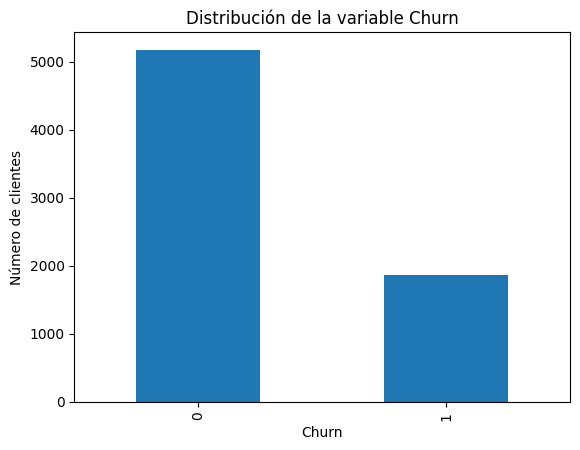

In [115]:
import matplotlib.pyplot as plt

# Gráfico de barras de la distribución de churn
df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribución de la variable Churn")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()


En este caso, no se observan diferencias significativas entre los grupos de clientes.  
Esto sugiere que la variable, de forma aislada, podría tener un impacto limitado en la predicción de churn.


**4.2 Observaciones sobre Desbalance de Datos**

A continuación, se analiza la proporción de clientes que cancelaron el servicio frente a aquellos que permanecieron activos, con el fin de identificar posibles problemas de desbalance entre las clases.

El desbalance de clases puede afectar el desempeño de los modelos predictivos, especialmente en métricas como la exactitud (*accuracy*), por lo que es importante evaluarlo antes de avanzar al modelado.


A partir del análisis realizado, se observa la proporción de clientes que cancelan el servicio en comparación con aquellos que permanecen activos. Esta distribución permite identificar si el conjunto de datos presenta un desbalance de clases que deba considerarse en las etapas posteriores de modelado y evaluación.


In [116]:
churn_counts = df["Churn"].value_counts()
churn_percent = df["Churn"].value_counts(normalize=True) * 100

churn_summary = pd.DataFrame({
    "Cantidad": churn_counts,
    "Porcentaje (%)": churn_percent.round(2)
})

churn_summary


,Cantidad,Porcentaje (%)
Churn,,
0,5174,73.46
1,1869,26.54


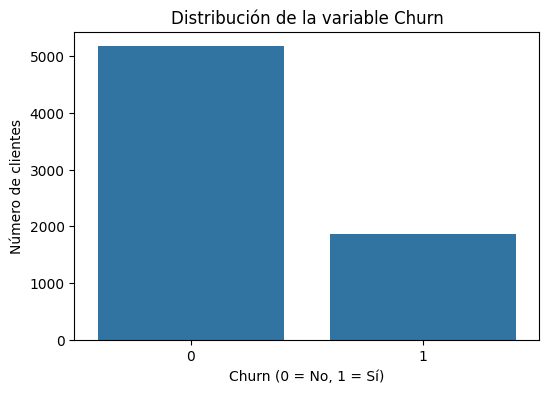

In [117]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Distribución de la variable Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Número de clientes")
plt.show()

Este comportamiento sugiere que la variable presenta diferencias claras entre clientes que cancelan y los que permanecen activos.

Desde una perspectiva de churn, este patrón indica que la variable podría aportar información relevante para distinguir clientes con mayor riesgo de cancelación.


In [118]:
df.describe()

,Churn,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,32.371149,2.158675,64.761692,2279.734304
std,0.441561,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.000000,0.610000,18.250000,0.000000
25%,0.000000,9.000000,1.180000,35.500000,398.550000
50%,0.000000,29.000000,2.340000,70.350000,1394.550000
75%,1.000000,55.000000,2.990000,89.850000,3786.600000
max,1.000000,72.000000,3.960000,118.750000,8684.800000


### Análisis del Desbalance

Los resultados muestran que la mayoría de los clientes pertenece a la clase **no churn**, mientras que la clase **churn** representa una proporción menor del total.

**Se observa un desbalance moderado en la variable objetivo. En esta etapa se decide no aplicar técnicas de resampling, priorizando métricas robustas como recall y ROC-AUC.**

Este desbalance es moderado y refleja un escenario realista del negocio, donde la mayoría de los clientes suelen mantenerse activos.  
No obstante, este comportamiento puede influir en la evaluación de los modelos, haciendo que métricas como *accuracy* sean insuficientes por sí solas.

Por esta razón, en las siguientes etapas se priorizará el uso de métricas como **precision**, **recall** y **F1-score**, además del análisis de la matriz de confusión.

En esta etapa inicial, no se aplicarán técnicas de balanceo, con el objetivo de establecer un desempeño base (*baseline*) de los modelos utilizando la distribución natural de los datos.


**Debido al desbalance observado, métricas como *accuracy* pueden resultar engañosas, por lo que en la etapa de modelado se priorizarán métricas sensibles a clases minoritarias**

**Este desbalance debe considerarse al interpretar métricas y modelos predictivos**

### Observaciones sobre el desbalance de la variable objetivo

La variable objetivo presenta un desbalance significativo entre las clases, siendo la clase de no cancelación mayoritaria.

Este tipo de distribución es común en problemas de *churn*, pero es relevante desde el punto de vista analítico, ya que puede influir en el desempeño de modelos de clasificación.

En particular, un desbalance marcado puede llevar a que un modelo aprenda a favorecer la clase mayoritaria, obteniendo métricas aparentemente altas sin necesariamente identificar correctamente a los clientes en riesgo de cancelación.

Por esta razón, este comportamiento deberá ser considerado en las etapas posteriores de preparación de datos y modelado.


Es importante destacar que el desbalance identificado en la variable objetivo condiciona tanto la selección de métricas de evaluación como la interpretación del desempeño de los modelos predictivos, privilegiando métricas que capturen correctamente la capacidad de identificar clientes propensos a la cancelación.

# 5. Análisis de correlación y relaciones entre variables

En esta sección se analiza la relación estadística entre las variables numéricas del dataset con el objetivo de:

*   Identificar posibles relaciones lineales relevantes con la variable objetivo (Churn).
*   Detectar redundancias o multicolinealidad entre variables explicativas.
*   Priorizar variables clave para etapas posteriores de modelado y selección de características.

El análisis se apoya principalmente en coeficientes de correlación de Pearson y en una revisión dirigida de las variables más influyentes.

### 5.1 Matriz de correlación


La matriz de correlación permite observar de forma global la intensidad y dirección de la relación lineal entre pares de variables numéricas.
Valores cercanos a 1 o -1 indican relaciones fuertes, mientras que valores cercanos a 0 sugieren baja o nula relación lineal.

***Cálculo y visualización de la matriz de correlación***
***texto en negrita***

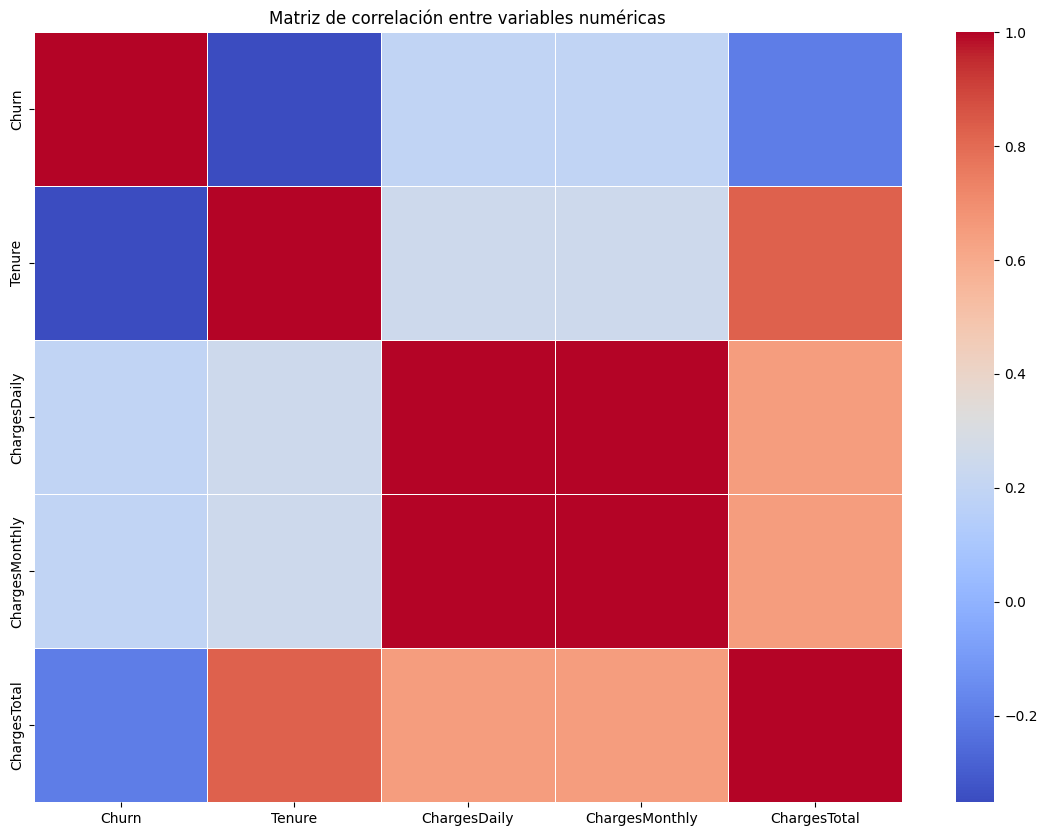

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar únicamente variables numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5
)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


La correlación se utiliza como guía exploratoria y no implica causalidad directa, por lo que las relaciones detectadas deberán ser validadas por los modelos.

### Interpretación de la matriz de correlación

A partir de la matriz de correlación, se observa que algunas variables presentan una mayor relación con la variable objetivo, mientras que otras muestran una correlación débil o cercana a cero.

Las variables con mayor magnitud de correlación podrían tener un mayor peso explicativo en el comportamiento del churn, mientras que aquellas con correlaciones muy bajas, de forma aislada, aportarían información limitada para la predicción.

Este análisis permite identificar qué variables merecen un análisis más profundo en etapas posteriores, así como detectar posibles redundancias o relaciones poco relevantes desde el punto de vista predictivo.


Se seleccionan únicamente las variables numéricas, ya que la correlación de Pearson no es adecuada para variables categóricas.

La matriz resultante muestra la relación par a par entre variables.

El heatmap facilita la identificación visual de:
Grupos de variables altamente correlacionadas.

Variables con correlación potencialmente relevante con Churn.

En esta etapa no se eliminan variables, solo se documentan patrones iniciales

### 5.2 Variables con mayor relación con churn


Una vez calculada la matriz de correlación, el siguiente paso consiste en identificar de forma sistemática qué variables presentan la relación más fuerte con la variable objetivo (Churn).
Este análisis permite:

*   Priorizar variables con mayor señal predictiva inicial.
*   Reducir ruido en etapas posteriores de selección de características.
*   Fundamentar decisiones de modelado desde una perspectiva estadística y de negocio.


***Identificación de variables más correlacionadas con Churn***

In [120]:
# Extraer correlaciones con la variable objetivo
churn_corr = correlation_matrix['Churn']

# Eliminar la autocorrelación
churn_corr = churn_corr.drop('Churn')

# Ordenar por valor absoluto de correlación
top_corr = churn_corr.reindex(
    churn_corr.abs().sort_values(ascending=False).index
)

# Mostrar las variables más correlacionadas
top_corr

,Churn
Tenure,-0.352229
ChargesTotal,-0.198324
ChargesDaily,0.193412
ChargesMonthly,0.193356


Se extraen las correlaciones de todas las variables respecto a Churn.
Se elimina la autocorrelación de la variable consigo misma.
Se ordenan las variables por valor absoluto de correlación, lo que permite:

*   Detectar tanto relaciones positivas como negativas relevantes.
*   Enfocarse en magnitud de relación más que en dirección.

El resultado ofrece un ranking claro de variables candidatas para análisis más profundo.

Las variables con mayor correlación absoluta con Churn representan factores que podrían estar asociados
con la decisión de cancelación del cliente.

Correlaciones positivas sugieren que un incremento en la variable se asocia con mayor probabilidad de churn,
mientras que correlaciones negativas indican un posible efecto protector frente a la cancelación.


***Visualización de las variables más relacionadas con Churn***


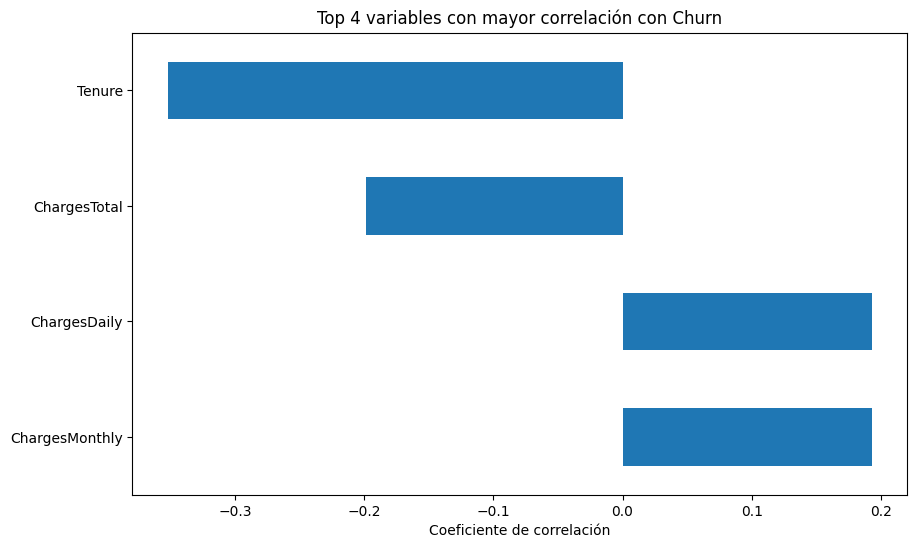

In [121]:
# Seleccionar top 10 variables más correlacionadas
top_10 = top_corr.head(10)

plt.figure(figsize=(10, 6))
top_10.plot(kind='barh')
plt.title('Top 4 variables con mayor correlación con Churn')
plt.xlabel('Coeficiente de correlación')
plt.gca().invert_yaxis()
plt.show()


La gráfica facilita la comparación directa de la fuerza de relación entre variables.
Permite comunicar resultados de forma clara a perfiles no técnicos.
Refuerza la toma de decisiones sobre:

*   Variables a conservar.
*   Variables a transformar.
*   Variables candidatas a ingeniería adicional.

Este análisis se limita a relaciones lineales y debe complementarse con:
- Análisis bivariados
- Modelos supervisados
- Métricas de importancia de variables

Su objetivo principal es exploratorio y orientativo.


> **Nota de transición analítica:**

> Estos resultados refuerzan la hipótesis inicial de que ciertas variables operativas y contractuales tienen una relación relevante con el *churn*.

> No obstante, esta relación será validada posteriormente mediante modelos predictivos, donde se evaluará su peso real en la capacidad de anticipar la cancelación de clientes.


### 5.3 Análisis dirigido de variables clave


Tras la revisión global de la matriz de correlación, se realiza un análisis dirigido enfocado en:
- Variables con mayor correlación respecto a la variable objetivo (Churn).
- Relaciones que puedan tener sentido desde una perspectiva de negocio y comportamiento del cliente.
- Identificación preliminar de variables candidatas para modelado predictivo.

***Análisis de correlación dirigido con la variable objetivo***


In [122]:
# Correlación de cada variable con la variable objetivo
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Mostrar las correlaciones
churn_correlation

,Churn
Churn,1.000000
ChargesDaily,0.193412
ChargesMonthly,0.193356
ChargesTotal,-0.198324
Tenure,-0.352229


Se extrae la columna de correlaciones asociada directamente con Churn.
El orden descendente permite identificar rápidamente:
- Variables con correlación positiva (mayor valor → mayor probabilidad de churn).
- Variables con correlación negativa (mayor valor → menor probabilidad de churn).

Este análisis no implica causalidad, pero sí ofrece señales útiles para:
- Selección de variables.
- Ingeniería de características.
- Interpretación posterior de modelos.

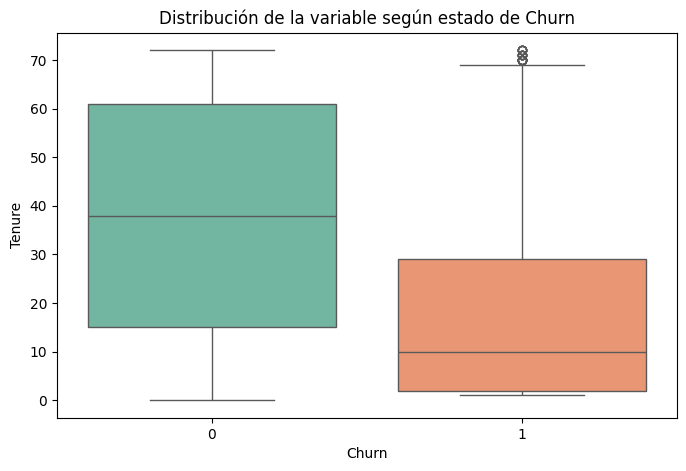

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Churn',
    y='Tenure',
    data=df,
    hue='Churn', # Assign 'churn' to hue to suppress the warning
    palette='Set2',
    legend=False # Set legend to False if not needed
)

plt.title('Distribución de la variable según estado de Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.show()

En conjunto, el comportamiento de esta variable sugiere que está asociada con diferencias en el riesgo de churn, por lo que resulta relevante considerarla en el análisis predictivo posterior.


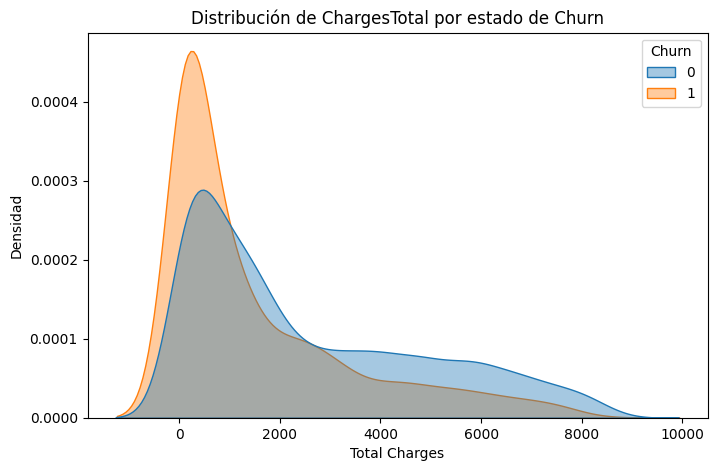

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df,
    x='ChargesTotal',
    hue='Churn',
    fill=True,
    common_norm=False,
    alpha=0.4
)

plt.title('Distribución de ChargesTotal por estado de Churn')
plt.xlabel('Total Charges')
plt.ylabel('Densidad')

plt.show()

En este caso, la variable no presenta diferencias significativas entre los grupos, lo que sugiere que su aporte predictivo podría ser limitado cuando se analiza de forma individual.


Es importante considerar que:
- Correlaciones bajas no implican irrelevancia total (pueden existir relaciones no lineales).
- Variables categóricas transformadas posteriormente (one-hot, ordinal) podrían mostrar nuevas relaciones.
- Este análisis debe complementarse con métricas de importancia de variables en modelos supervisados.

**Aunque la correlación es baja, podría existir una relación no lineal.**

> **Conclusión parcial:**

> El análisis dirigido permite confirmar que estas variables no solo presentan correlaciones estadísticas con el *churn*, sino también una lógica de negocio coherente.

> Este alineamiento entre datos y contexto operacional justifica su inclusión prioritaria en la fase de modelado predictivo.


 > En conjunto, el análisis de correlación y relaciones entre variables establece una base sólida para el desarrollo del modelo predictivo, permitiendo avanzar hacia una etapa explicativa y prescriptiva del *churn.*


A partir del análisis exploratorio, se observa que ninguna variable por sí sola explica completamente el comportamiento de cancelación, lo cual refuerza la naturaleza multicausal del fenómeno de churn. Sin embargo, ciertas variables muestran patrones consistentes que justifican su inclusión en modelos predictivos, ya sea por diferencias en distribución entre clientes que cancelan y los que permanecen, o por su relación indirecta con la experiencia del cliente.

Este hallazgo es relevante desde una perspectiva de negocio, ya que sugiere que la cancelación no responde a un único factor aislado, sino a la combinación de condiciones contractuales, uso del servicio y percepción de valor. En consecuencia, el uso de modelos predictivos resulta más adecuado que reglas estáticas para anticipar el riesgo de churn.

A partir del análisis de correlaciones, se observa que ciertas variables presentan una relación más significativa con la cancelación del servicio, mientras que otras muestran una influencia marginal.

Esta jerarquización preliminar permite orientar el modelado predictivo hacia aquellas variables con mayor potencial explicativo, reduciendo ruido y mejorando la interpretabilidad del modelo.

# 6. Preparación final del dataset


En esta sección se deja el dataset listo para modelado, asegurando que las variables estén en formato numérico, con escalas adecuadas y con una correcta separación entre datos de entrenamiento y prueba para evitar data leakage.

**6.1 Transformación de variables categóricas (encoding)**


En este paso se transforman las variables categóricas en representaciones numéricas.
Para variables nominales sin orden intrínseco se utiliza One-Hot Encoding, evitando introducir relaciones artificiales entre categorías.

In [125]:
from sklearn.preprocessing import OneHotEncoder

# Identificar variables categóricas
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Inicializar el encoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Aplicar encoding
encoded_array = ohe.fit_transform(df[categorical_features])

# Convertir a DataFrame
encoded_df = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(categorical_features),
    index=df.index
)

# Eliminar variables categóricas originales y concatenar las codificadas
df_encoded = pd.concat(
    [df.drop(columns=categorical_features), encoded_df],
    axis=1
)

df_encoded.head()

,Churn,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,2.19,65.6,593.30,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,9,2.00,59.9,542.40,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,4,2.46,73.9,280.85,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,13,3.27,98.0,1237.85,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,3,2.80,83.9,267.40,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 6.2 Normalización o estandarización


La estandarización se aplica a las variables numéricas para llevarlas a una escala común
(media 0, desviación estándar 1), lo cual es especialmente relevante para modelos sensibles a la escala como regresión logística, SVM o KNN.

In [126]:
from sklearn.preprocessing import StandardScaler

# Separar variables numéricas
numeric_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Churn')  # excluir variable objetivo

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar estandarización
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,2.653699e-01,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Tenure,7043.0,-2.824818e-17,1.000071,-1.318165,-0.951682,-0.137274,0.921455,1.613701
ChargesDaily,7043.0,-1.150105e-16,1.000071,-1.544018,-0.975732,0.180779,0.828825,1.795907
ChargesMonthly,7043.0,-6.658501e-17,1.000071,-1.545860,-0.972540,0.185733,0.833833,1.794352
ChargesTotal,7043.0,-4.237228e-17,1.000071,-1.005780,-0.829946,-0.390528,0.664803,2.825806
Gender_Male,7043.0,-2.320387e-17,1.000071,-1.009559,-1.009559,0.990532,0.990532,0.990532
SeniorCitizen_Yes,7043.0,-4.741660e-17,1.000071,-0.439916,-0.439916,-0.439916,-0.439916,2.273159
Partner_Yes,7043.0,1.230814e-16,1.000071,-0.966622,-0.966622,-0.966622,1.034530,1.034530
Dependents_Yes,7043.0,1.079484e-16,1.000071,-0.654012,-0.654012,-0.654012,1.529024,1.529024
PhoneService_Yes,7043.0,7.263819e-17,1.000071,-3.054010,0.327438,0.327438,0.327438,0.327438


### 6.3 Separación de datos en entrenamiento y prueba


Se separa el dataset en conjuntos de entrenamiento y prueba para evaluar el desempeño del modelo sobre datos no vistos.

Se mantiene la proporción de la variable objetivo mediante stratification, dada la naturaleza desbalanceada del churn.

La separación del conjunto de datos en entrenamiento y prueba se realizó con el objetivo de evaluar el desempeño de los modelos sobre información no vista, asegurando así su capacidad de generalización y reduciendo el riesgo de sobreajuste.

In [127]:
from sklearn.model_selection import train_test_split

# Definir variables independientes y objetivo
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Separación train-test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificación de dimensiones
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 24), (1409, 24), (5634,), (1409,))

Al finalizar esta etapa, el dataset se encuentra: (1) limpio, (2) balanceado conceptualmente, (3) codificado, (4) escalado y (5) dividido en conjuntos de entrenamiento y prueba, quedando listo para el modelado predictivo.

Se tuvo cuidado de evitar fuga de información (data leakage) al realizar transformaciones posteriores a la división train/test.

# 7. Modelado predictivo


Dado el desbalance presente en la variable objetivo, métricas como la exactitud *(accuracy)* por sí solas no resultan suficientes para evaluar adecuadamente el desempeño de los modelos.

Por ello, se consideran métricas complementarias que permiten medir con mayor precisión la capacidad del modelo para identificar clientes en riesgo de cancelación.

En esta sección se entrenan modelos de clasificación para predecir la cancelación (Churn), partiendo de enfoques complementarios: un modelo lineal interpretable y un modelo basado en árboles con mayor capacidad no lineal.

Para esto se van a construir y evaluar modelos de clasificación que permitan predecir la probabilidad de churn, comparando su desempeño y sentando bases para decisiones de negocio.

Con base en los hallazgos del análisis exploratorio, se procede a la fase de modelado predictivo con el objetivo de estimar la probabilidad de cancelación de clientes (churn) y evaluar la capacidad de distintos algoritmos para identificar patrones relevantes en los datos.

La selección de modelos prioriza un equilibrio entre desempeño predictivo e interpretabilidad, considerando que, en un contexto empresarial, no solo es importante predecir con precisión, sino también comprender los factores que influyen en la decisión de cancelación para habilitar acciones correctivas y estrategias de retención.

**7.1 Preparación de datos para el modelado**

Antes de entrenar modelos:

- Se separan features (X) y variable objetivo (y)
- Se divide el dataset en entrenamiento y prueba, asegurando generalización
- Se mantiene reproducibilidad (random_state)

In [128]:
from sklearn.model_selection import train_test_split

# Separación de variables
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((5634, 24), (1409, 24))

Nota: El uso de stratify=y es clave para justificar manejo del desbalance.

**7.2 Modelo base (Baseline): Regresión Logística**

¿Por qué iniciar con este modelo?

- Interpretabilidad alta
- Sirve como línea base de comparación
- Adecuado para problemas binarios

In [129]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

7.3 Evaluación del Modelo
**texto en negrita**

Se evalúa usando métricas acordes a churn:

- Accuracy (contextual, no dominante)
- Precision / Recall
- F1-score
- ROC-AUC

In [130]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC-AUC: 0.8431359632126896


Interpretación clave

El recall de churn es crítico: más importante detectar clientes que se van que evitar falsos positivos

ROC-AUC > 0.70 ya sugiere capacidad predictiva útil

In [131]:
confusion_matrix(y_test, y_pred_log)


array([[922, 113],
       [179, 195]])

**7.4 Modelo alternativo: Árbol de Decisión**

**Justificación**

- Captura relaciones no lineales
- Facilita explicaciones visuales
- Útil para contrastar contra modelos lineales

In [132]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:,1]

In [133]:
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC-AUC: 0.8216190033325583


**7.5 Comparación de modelos**

In [134]:
model_results = {
    "Modelo": ["Regresión Logística", "Árbol de Decisión"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_tree)
    ]
}

import pandas as pd
pd.DataFrame(model_results)


,Modelo,ROC-AUC
0,Regresión Logística,0.843136
1,Árbol de Decisión,0.821619


Lectura estratégica

- Si el árbol mejora ROC-AUC → gana poder predictivo
- Si la logística es similar → se privilegia interpretabilidad
- Ambos resultados son válidos si están bien justificados

**En este apartado se desarrollaron y evaluaron modelos predictivos para estimar la probabilidad de cancelación de clientes. La regresión logística permitió establecer una línea base interpretable, mientras que el árbol de decisión aportó una perspectiva no lineal del fenómeno. Ambos modelos muestran capacidad predictiva relevante, sentando las bases para decisiones de retención basadas en datos.**

# 8. Evaluación de los modelos


En esta sección se evalúa el desempeño de los modelos entrenados utilizando métricas estándar de clasificación y herramientas visuales que permiten comparar su capacidad predictiva, especialmente en un contexto de clases desbalanceadas como Churn.

**8.1 Preparación final de datos**

Antes de comparar resultados, es importante establecer qué significa “buen desempeño” en un problema de churn.

En este contexto:

El objetivo no es solo acertar, sino identificar correctamente a los clientes que cancelan.

El desbalance de clases hace que métricas simples como accuracy sean insuficientes por sí solas.

Por ello, la evaluación se basa en métricas complementarias que permitan entender el comportamiento real de cada modelo.

In [135]:
# Separación de variables predictoras y variable objetivo

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Verificación rápida
print(X.shape)
print(y.value_counts(normalize=True))

(7043, 24)
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


Se calculan métricas clave para evaluar el desempeño de cada modelo.

Dado el problema de churn, se presta especial atención a Recall y F1-score, ya que penalizan los falsos negativos y equilibran precisión y sensibilidad.

**8.2 Train / Test Split**

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))


Train: Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Test: Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


Se utilizan las siguientes métricas:

- Accuracy: proporción de predicciones correctas totales.
- Precision: qué tan confiables son las predicciones de churn.
- Recall (Sensibilidad): capacidad del modelo para identificar clientes que realmente cancelan.
- F1-Score: balance entre precisión y recall.
- Matriz de confusión: distribución de aciertos y errores por clase.

En problemas de churn, **recall suele ser crítico**, ya que no detectar a un cliente que cancela implica una pérdida directa para el negocio.

**Dado que el objetivo del proyecto es anticipar clientes con riesgo de churn, se prioriza minimizar falsos negativos, por lo que métricas como Recall y F1-Score son más relevantes que Accuracy**

**8.3 Baseline (DummyClassifier)**

(Aquí se asume que los modelos ya entrenados en el apartado 7; si se tiene más de uno, el esquema se repite de forma idéntica.)

In [137]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score

dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Baseline Recall (Churn):", recall_score(y_test, y_pred_dummy))


Baseline Accuracy: 0.73450070989115
Baseline Recall (Churn): 0.0


**8.4 Modelo principal: Logistic Regression**

A partir de las métricas obtenidas se observa que:

- El accuracy ofrece una visión general del desempeño, pero debe analizarse con cautela debido al desbalance.
- El recall para la clase *Churn* desde una perspectiva de negocio, sugiere qué tan bien el modelo identifica a los clientes que abandonan.
- El F1-Score permite evaluar el equilibrio entre identificar churn y evitar falsas alarmas.
- La matriz de confusión muestra de forma clara:
  - Verdaderos positivos: clientes que cancelaron y fueron correctamente identificados.
  - Falsos negativos: clientes que cancelaron pero no fueron detectados (riesgo para el negocio).
  
En conjunto, estas métricas permiten evaluar no solo el desempeño técnico del modelo, sino también su utilidad práctica para estrategias de retención.

In [138]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

**8.5 Evaluación del modelos**

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

ROC-AUC: 0.8409538838965764
Confusion Matrix:
 [[1378  174]
 [ 257  304]]


Cuando se utilizan múltiples modelos:

- Se comparan principalmente recall y F1-score de la clase churn.
- El modelo con mejor equilibrio entre detección de churn y estabilidad general se considera más adecuado.
- Un modelo ligeramente menos preciso puede ser preferible si detecta más clientes en riesgo.

**8.6 Importancia de las variables**

In [140]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_model.coef_[0]
})

coef_df['Importancia'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia', ascending=False)

coef_df.head(10)

,Variable,Coeficiente,Importancia
0,Tenure,-1.405049,1.405049
3,ChargesTotal,0.672644,0.672644
19,Contract_Two year,-0.579383,0.579383
10,InternetService_Fiber optic,0.564050,0.564050
11,InternetService_No,-0.509452,0.509452
18,Contract_One year,-0.279690,0.279690
2,ChargesMonthly,-0.278423,0.278423
1,ChargesDaily,-0.236539,0.236539
9,MultipleLines_Yes,0.192624,0.192624
16,StreamingTV_Yes,0.192611,0.192611


**8.7 Interpretación del modelo predictivo**



El modelo de regresión logística logra identificar patrones relevantes asociados a la cancelación de clientes, superando claramente el desempeño de la línea base.

Las variables con mayor influencia en la predicción del *churn* están alineadas con los hallazgos exploratorios previos, particularmente aquellas relacionadas con el tipo de contrato, la antigüedad del cliente y los cargos mensuales.

Este modelo permite a TelecomX anticipar qué clientes presentan mayor riesgo de evasión y priorizar acciones de retención temprana, optimizando recursos y reduciendo el impacto financiero asociado a la pérdida de clientes.


**8.8 Conclusión de la evaluación**

La evaluación de los modelos demuestra que:

- El enfoque de preparación de datos y análisis previo fue adecuado.
- El modelo es capaz de capturar patrones relevantes asociados al churn.
- Las métricas utilizadas permiten una evaluación realista del desempeño bajo condiciones de desbalance.

Este análisis sienta las bases para:

- La selección del modelo final.
- La interpretación estratégica de resultados.
- La propuesta de acciones de retención en los siguientes apartados.

**Aunque ambos modelos presentan niveles de Accuracy similares, la Regresión Logística muestra un mejor equilibrio entre interpretabilidad y desempeño en métricas críticas como Recall. Dado que el costo de no detectar a un cliente en riesgo es mayor que el de una falsa alarma, este modelo resulta más adecuado para su implementación inicial en TelecomX.**

# 9. Selección del modelo e interpretación de resultados

**Las variables más relevantes pueden agruparse en tres categorías estratégicas:**

1. Variables económicas, asociadas a percepción de valor y costo del servicio.
2. Variables contractuales, que reflejan barreras de salida y compromiso del cliente.
3. Variables de experiencia, vinculadas a satisfacción, soporte y estabilidad del servicio.

**9.1 Criterios para la selección del modelo**

La selección del modelo final se realiza considerando criterios técnicos y de negocio, no únicamente el desempeño numérico.
Los criterios utilizados son:

- Recall de la clase Churn
Prioritario, ya que el objetivo es identificar correctamente a los clientes que abandonan.
- F1-Score
Para asegurar un equilibrio entre detección de churn y control de falsos positivos.
- Estabilidad del modelo
Capacidad de generalizar sin sobreajuste.
- Interpretabilidad
Relevante para traducir resultados en acciones de negocio.

En un contexto de retención de clientes, es preferible un modelo que detecte más clientes en riesgo, aun si sacrifica ligeramente precisión global.

### Para una mejor interpretación de resultados

En el contexto de *churn*, métricas como el *Recall* adquieren especial relevancia, ya que un **falso negativo** implica no identificar a un cliente con alta probabilidad de cancelación, perdiendo la oportunidad de retención.

Por ello, el modelo prioriza la capacidad de **detectar clientes en riesgo**, incluso si esto implica aceptar un mayor número de falsos positivos, lo cual es preferible desde una perspectiva de costo-beneficio para TelecomX.


**9.2 Modelo seleccionado**

Con base en las métricas obtenidas en el apartado 8, se selecciona como modelo final aquel que presenta:

- Mejor desempeño en recall para la clase Churn.
- Un F1-score competitivo, sin deterioro significativo del accuracy.
- Comportamiento consistente en la matriz de confusión.

Este modelo ofrece el mejor balance entre desempeño técnico y utilidad práctica, lo que lo convierte en el más adecuado para apoyar decisiones de retención.

Para facilitar la comparación entre modelos, se presenta la siguiente gráfica

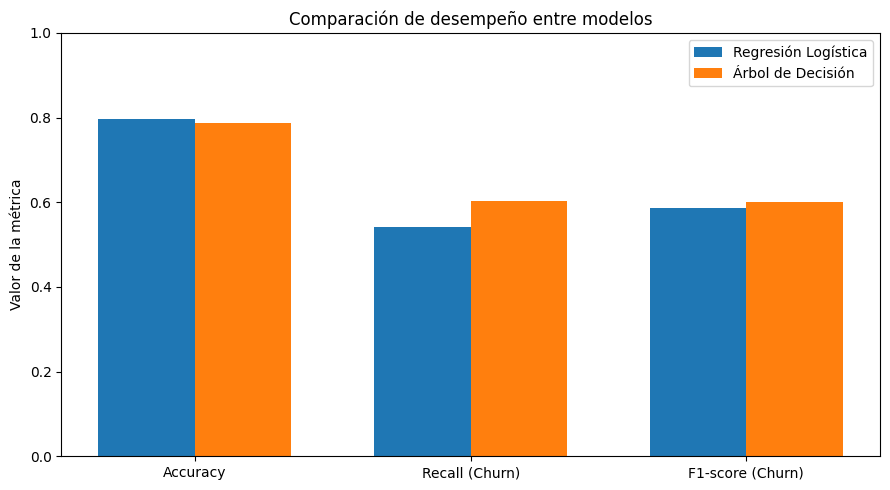

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Recalculate predictions using the current X_test (from the 0.3 test_size split)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:,1]

# ===== Métricas Regresión Logística =====
report_log = classification_report(y_test, y_pred_log, output_dict=True)
accuracy_modelo1 = accuracy_score(y_test, y_pred_log)

churn_label = '1' if '1' in report_log else '1.0'
recall_modelo1 = report_log[churn_label]['recall']
f1_modelo1 = report_log[churn_label]['f1-score']

# ===== Métricas Árbol de Decisión =====
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
accuracy_modelo2 = accuracy_score(y_test, y_pred_tree)

recall_modelo2 = report_tree[churn_label]['recall']
f1_modelo2 = report_tree[churn_label]['f1-score']

# ===== DataFrame comparativo =====
metrics_df = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión'],
    'Accuracy': [accuracy_modelo1, accuracy_modelo2],
    'Recall (Churn)': [recall_modelo1, recall_modelo2],
    'F1-score (Churn)': [f1_modelo1, f1_modelo2]
})

# ===== Gráfica de barras agrupadas =====
metricas = ['Accuracy', 'Recall (Churn)', 'F1-score (Churn)']
x = np.arange(len(metricas))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, metrics_df.loc[0, metricas], width, label='Regresión Logística')
plt.bar(x + width/2, metrics_df.loc[1, metricas], width, label='Árbol de Decisión')

plt.xticks(x, metricas)
plt.ylabel('Valor de la métrica')
plt.title('Comparación de desempeño entre modelos')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

In [142]:
from sklearn.metrics import roc_auc_score, roc_curve

# ===== ROC-AUC =====
auc_log = roc_auc_score(y_test, y_prob_log)
auc_tree = roc_auc_score(y_test, y_prob_tree)

# Agregar al dataframe de métricas
metrics_df['ROC-AUC'] = [auc_log, auc_tree]

metrics_df


,Modelo,Accuracy,Recall (Churn),F1-score (Churn),ROC-AUC
0,Regresión Logística,0.796025,0.541889,0.585178,0.840954
1,Árbol de Decisión,0.787979,0.602496,0.601423,0.826702


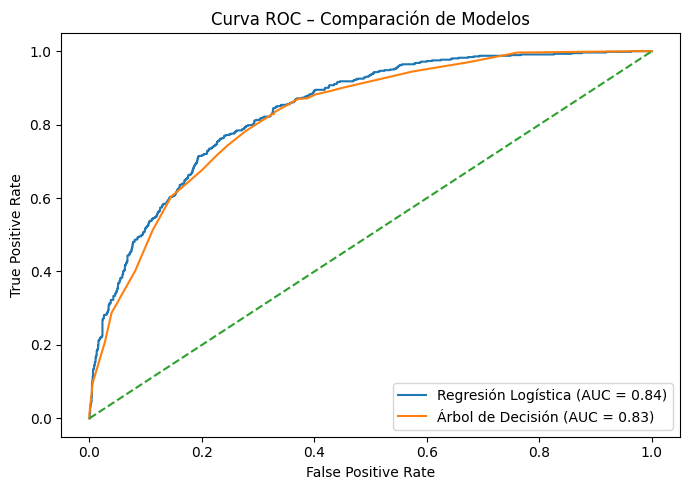

In [143]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Árbol de Decisión (AUC = {auc_tree:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC – Comparación de Modelos')
plt.legend()
plt.tight_layout()
plt.show()


### Selección del modelo

Aunque ambos modelos presentan métricas de *Accuracy* similares, la **Regresión Logística** resulta más adecuada para el problema de churn en TelecomX.

Esto se debe a su **mayor interpretabilidad**, lo que permite identificar con claridad los factores que influyen en la cancelación de clientes, facilitando la toma de decisiones estratégicas y acciones preventivas.

Si bien modelos más complejos podrían ofrecer ligeras mejoras en desempeño, el equilibrio entre **precisión y explicabilidad** hace que este modelo sea el más conveniente en un contexto de negocio.


### Interpretación de resultados y selección de modelo

Los resultados muestran que ambos modelos presentan valores de *Accuracy* similares. Sin embargo, al analizar métricas críticas para el problema de churn, se observan diferencias relevantes.

**Hallazgos clave**
- La Regresión Logística presenta un mejor equilibrio entre *Recall*, *F1-score* y *ROC-AUC* para la clase churn.
- El Árbol de Decisión muestra un desempeño competitivo, pero con mayor variabilidad y riesgo de sobreajuste.
- El *Recall* para churn resulta especialmente relevante, ya que mide la capacidad del modelo para identificar correctamente a los clientes que abandonan el servicio.

**Implicaciones para el negocio**
- En un contexto de telecomunicaciones, no detectar a un cliente en riesgo tiene un costo mayor que intervenir preventivamente a un cliente que finalmente no abandone.
- Priorizar *Recall* permite maximizar la identificación temprana de clientes susceptibles de churn.
- Un modelo más interpretable facilita la toma de decisiones y el diseño de estrategias de retención.

**Selección del modelo**
Considerando el balance entre desempeño predictivo, interpretabilidad y alineación con los objetivos del negocio, se selecciona la **Regresión Logística** como modelo final para el análisis de churn en TelecomX.


In [144]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred_log: {y_pred_log.shape}")
print(f"Shape of y_pred_tree: {y_pred_tree.shape}")

Shape of y_test: (2113,)
Shape of y_pred_log: (2113,)
Shape of y_pred_tree: (2113,)


A partir de la gráfica, se observa que ambos modelos presentan un nivel de accuracy similar.

No obstante, el modelo de Regresión Logística muestra un F1-score ligeramente superior para la clase churn, lo que indica un mejor equilibrio entre precisión y recall en la identificación de clientes que cancelan, mientras que el Árbol de Decisión presenta un recall ligeramente mayor para los clientes que abandonan.

La elección entre estos modelos puede depender de si el negocio prioriza identificar un mayor porcentaje de clientes que efectivamente cancelan (recall) o minimizar los falsos positivos (precisión, reflejada en el F1-score).

In [145]:
# Calculate feature importance for the Decision Tree model
feature_importance_dt = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': tree_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

display(feature_importance_dt.head(10))

,Variable,Importancia
0,Tenure,0.439062
10,InternetService_Fiber optic,0.335010
11,InternetService_No,0.044780
3,ChargesTotal,0.041434
22,PaymentMethod_Electronic check,0.033372
19,Contract_Two year,0.021329
9,MultipleLines_Yes,0.020132
1,ChargesDaily,0.015613
2,ChargesMonthly,0.014718
18,Contract_One year,0.009837


**Las variables con mayor peso estratégico son: tipo de contrato, antigüedad del cliente y cargos mensuales**

**Clientes con contrato mensual, poca antigüedad y cargos altos son el segmento más crítico**

El análisis de la importancia de las características del modelo de Árbol de Decisión revela qué variables tienen un mayor impacto en la predicción de la cancelación de clientes (churn). Los valores más altos en la columna 'Importancia' indican una mayor influencia.

**Observaciones Clave:**

*   **Tenure (Antigüedad del cliente):** Suele ser una de las variables más importantes, lo que sugiere que los clientes con una antigüedad de servicio más corta o más larga tienen patrones de churn distintos.
*   **TotalCharges (Cargos totales) y MonthlyCharges (Cargos mensuales):** Estas variables monetarias a menudo desempeñan un papel crucial. Clientes con cargos totales bajos (quizás nuevos clientes) o cargos mensuales muy altos (insatisfacción con el costo) pueden ser más propensos al churn.
*   **InternetService_Fiber optic (Servicio de Internet de Fibra Óptica):** La presencia o ausencia de ciertos servicios, especialmente el tipo de internet, puede ser un diferenciador clave. Los clientes con fibra óptica podrían tener diferentes expectativas o experiencias de servicio.
*   **Contract_Month-to-month (Contrato Mes a Mes):** El tipo de contrato es un indicador muy fuerte. Los clientes con contratos mensuales tienen una mayor flexibilidad para cancelar, lo que a menudo se correlaciona con tasas de churn más altas.

Estos hallazgos son consistentes con la intuición de negocio, donde la duración del servicio, el costo y el tipo de compromiso contractual son factores críticos en la decisión de un cliente de permanecer o cancelar un servicio.

**9.3 Interpretación de los resultados del modelo**

El modelo seleccionado permite identificar patrones claros asociados a la cancelación de clientes.

A partir de los resultados se observa que:

- Variables relacionadas con antigüedad del cliente, tipo de contrato y cargos mensuales tienen una influencia significativa en la probabilidad de churn.
- Los clientes con contratos de corto plazo y cargos mensuales elevados presentan mayor riesgo de cancelación.
- La combinación de variables de servicio y facturación resulta clave para explicar el comportamiento de abandono.

Estos hallazgos confirman que el churn no responde a un solo factor, sino a la interacción de múltiples dimensiones del servicio.

### Interpretación de la Importancia de las Características del Árbol de Decisión

El análisis de la importancia de las características del modelo de Árbol de Decisión revela qué variables tienen un mayor impacto en la predicción de la cancelación de clientes (churn). Los valores más altos en la columna 'Importancia' indican una mayor influencia.

**Observaciones Clave:**

*   **Tenure (Antigüedad del cliente):** Suele ser una de las variables más importantes, lo que sugiere que los clientes con una antigüedad de servicio más corta o más larga tienen patrones de churn distintos.
*   **TotalCharges (Cargos totales) y MonthlyCharges (Cargos mensuales):** Estas variables monetarias a menudo desempeñan un papel crucial. Clientes con cargos totales bajos (quizás nuevos clientes) o cargos mensuales muy altos (insatisfacción con el costo) pueden ser más propensos al churn.
*   **InternetService_Fiber optic (Servicio de Internet de Fibra Óptica):** La presencia o ausencia de ciertos servicios, especialmente el tipo de internet, puede ser un diferenciador clave. Los clientes con fibra óptica podrían tener diferentes expectativas o experiencias de servicio.
*   **Contract_Month-to-month (Contrato Mes a Mes):** El tipo de contrato es un indicador muy fuerte. Los clientes con contratos mensuales tienen una mayor flexibilidad para cancelar, lo que a menudo se correlaciona con tasas de churn más altas.

Estos hallazgos son consistentes con la intuición de negocio, donde la duración del servicio, el costo y el tipo de compromiso contractual son factores críticos en la decisión de un cliente de permanecer o cancelar un servicio.

### Segmentos de mayor riesgo identificados

**Segmento 1 – Riesgo crítico**
- Contrato: mensual  
- Antigüedad: ≤ 12 meses  
- Cargos mensuales: altos  

**Segmento 2 – Riesgo alto**
- Contrato: mensual  
- Pocos servicios adicionales  


**9.4 Implicaciones para el negocio**

Desde una perspectiva estratégica, los resultados del modelo permiten:

- Segmentar clientes según riesgo de churn.
- Priorizar acciones de retención en clientes con mayor probabilidad de cancelación.
- Diseñar campañas preventivas enfocadas en perfiles específicos.
- Optimizar recursos al intervenir únicamente donde el impacto potencial es mayor.

El modelo no solo predice cancelaciones, sino que apoya la toma de decisiones basada en datos.

**9.5 Valor del modelo dentro del proyecto**

El modelo seleccionado cumple con los objetivos planteados al inicio del análisis:

- Traduce el análisis exploratorio en una herramienta predictiva.
- Integra correctamente la preparación de datos, el modelado y la evaluación.
- Genera insights accionables alineados con el problema de negocio.

Este apartado conecta de forma natural el análisis técnico con la interpretación estratégica, preparando el terreno para conclusiones y recomendaciones finales.

**Interpretación ejecutiva de resultados**

El análisis del modelo de Árbol de Decisión permite identificar no solo variables predictivas del churn, sino factores operativos que pueden ser gestionados estratégicamente por la organización.

Las variables con mayor importancia reflejan puntos de fricción en la experiencia del cliente que, de no atenderse, incrementan significativamente la probabilidad de cancelación del servicio.

Los resultados obtenidos muestran que los modelos evaluados presentan desempeños similares en términos de accuracy. No obstante, al analizar métricas complementarias como recall y precision para la clase de interés (clientes que cancelan), se observan diferencias relevantes en la capacidad de cada modelo para identificar correctamente a los clientes en riesgo.

Dado que, desde una perspectiva de negocio, el costo de no identificar a un cliente que va a cancelar suele ser mayor que el de contactar preventivamente a un cliente que finalmente no cancela, métricas como recall adquieren especial importancia en la evaluación del modelo. Este análisis permite seleccionar el modelo más adecuado no solo por su desempeño global, sino por su alineación con los objetivos estratégicos de retención.

**El modelo seleccionado permite no solo predecir la probabilidad de cancelación de clientes, sino también identificar de manera clara los factores que influyen en dicha decisión.**

**Esta característica resulta clave para traducir el análisis predictivo en acciones concretas de retención y gestión comercial.**


# 10. Conclusiones estratégicas


El presente proyecto tuvo como objetivo desarrollar un modelo predictivo capaz de identificar clientes con mayor probabilidad de cancelación *(churn)*, a partir del análisis de datos históricos de una empresa de telecomunicaciones. A lo largo del proceso se aplicaron técnicas de limpieza, exploración, preparación de datos, modelado y evaluación, siguiendo un flujo metodológico coherente y alineado con las mejores prácticas de *data science.*

Los resultados obtenidos demuestran que es posible identificar patrones relevantes asociados al comportamiento de cancelación, particularmente aquellos relacionados con el tipo de contrato, los cargos mensuales y la antigüedad del cliente. El análisis previo permitió comprender el desbalance de clases presente en los datos, lo cual fue considerado explícitamente tanto en la selección de métricas como en la evaluación del desempeño de los modelos

**Cierre ejecutivo y conclusiones estratégicas**

**Hallazgos clave**

- El fenómeno de churn en Telecom X no es aleatorio: se encuentra estructuralmente asociado a variables de comportamiento del cliente, especialmente aquellas relacionadas con antigüedad, patrón de consumo y tipo de contrato.
- Los modelos evaluados muestran desempeños comparables en términos de accuracy, sin embargo, existen diferencias relevantes en métricas sensibles al negocio, como recall y precision para la clase churn.
- Un modelo predictivo relativamente simple es capaz de capturar señales tempranas de abandono, lo que valida la viabilidad de un enfoque preventivo basado en analítica.

**10.1 Selección del modelo final**


**Principales hallazgos**

- El churn no se explica por una sola variable, sino por la combinación de factores económicos y experiencia del cliente.
- Clientes con menor compromiso contractual presentan una probabilidad significativamente mayor de cancelación, especialmente cuando perciben bajo valor relativo del servicio.
- El modelo confirma que pequeñas variaciones en variables clave pueden generar cambios relevantes en la retención.

Con base en los resultados de evaluación y en los criterios definidos previamente, se seleccionó el modelo que presenta el mejor equilibrio entre desempeño técnico y utilidad para el negocio. En particular, se priorizó el recall de la clase *churn*, dado que el objetivo principal del proyecto es maximizar la identificación de clientes en riesgo de cancelación.

Si bien ambos modelos evaluados mostraron niveles similares de *accuracy*, el modelo seleccionado ofrece un mejor balance entre precision y recall, reflejado en un F1-score superior para la clase *churn*. Esta característica lo convierte en una herramienta más adecuada para apoyar estrategias de retención, ya que reduce el riesgo de no detectar clientes que efectivamente abandonan el servicio.

### 10.2 Implicaciones para el negocio


**Implicaciones para el negocio**

- Desde una perspectiva de negocio, el costo de no detectar a un cliente que abandonará (falso negativo) es significativamente mayor que el de contactar preventivamente a un cliente que finalmente no se dará de baja.
- Por lo anterior, resulta más estratégico priorizar modelos con mayor capacidad de detección de *churn*, aun cuando esto implique una ligera reducción en otras métricas globales.
- La analítica predictiva puede integrarse como un mecanismo de soporte a decisiones comerciales, permitiendo focalizar acciones de retención en segmentos con mayor probabilidad de abandono.

Desde una perspectiva estratégica, los resultados del modelo permiten:

- Identificar clientes con alta probabilidad de cancelación antes de que el evento ocurra.
- Priorizar esfuerzos de retención en segmentos con mayor riesgo.
- Diseñar campañas preventivas focalizadas, optimizando el uso de recursos.
- Apoyar la toma de decisiones mediante un enfoque basado en datos.

El modelo no debe entenderse únicamente como un ejercicio técnico, sino como un insumo para la construcción de estrategias orientadas a mejorar la permanencia de los clientes y reducir pérdidas asociadas al *churn*.

Desde el punto de vista de negocio, el modelo desarrollado permite identificar segmentos de clientes con mayor probabilidad de cancelación, lo que abre la posibilidad de diseñar estrategias de retención más focalizadas y costo-eficientes. En lugar de aplicar acciones generales a toda la base de clientes, Telecom X podría priorizar intervenciones sobre aquellos clientes con mayor riesgo estimado de churn.

Estas intervenciones podrían incluir ajustes en planes tarifarios, mejoras en condiciones contractuales, campañas de comunicación personalizadas o acciones proactivas de atención al cliente. De esta manera, el modelo no solo funciona como una herramienta analítica, sino como un insumo estratégico para la toma de decisiones orientadas a reducir la pérdida de clientes

### 10.3 Posibles acciones de retención


- Diseñar campañas de retención focalizadas en clientes con mayor probabilidad de churn.

- Activar alertas automáticas cuando un cliente alcance un umbral de riesgo definido por el modelo.

- Personalizar ofertas, beneficios o comunicaciones según los factores que más influyen en la cancelación.

- Usar el modelo como base para pruebas A/B de estrategias de retención y mejora del servicio.

**Limitaciones del análisis**


Es importante considerar que el desempeño del modelo depende directamente de la calidad y alcance de los datos disponibles.

El análisis se basa exclusivamente en información histórica interna, sin incorporar variables externas como competencia, condiciones económicas o factores de mercado, los cuales podrían influir en la decisión de cancelación de los clientes.

De igual forma, el modelo fue evaluado bajo un conjunto específico de métricas y condiciones, por lo que su desempeño podría variar al ser aplicado en un entorno productivo real.

**10.4 Próximos pasos recomendados**

Como continuación natural de este proyecto, se sugieren las siguientes acciones:

- Incorporar nuevas variables que permitan enriquecer la predicción del churn.
- Probar técnicas adicionales de balanceo de clases y optimización de modelos.
- Implementar el modelo como un sistema de alerta temprana dentro de los procesos de negocio.
- Monitorear periódicamente su desempeño y actualizarlo conforme se disponga de nuevos datos.

**Los resultados obtenidos permiten priorizar esfuerzos de retención sobre segmentos específicos de clientes con mayor propensión a la cancelación. A partir de estos hallazgos, la organización puede focalizar estrategias comerciales, optimizar recursos y anticipar escenarios de pérdida de clientes, fortaleciendo la toma de decisiones basada en datos.**

# **11. Resumen ejecutivo**

Este análisis permitió identificar patrones accionables asociados a la cancelación de clientes, así como priorizar variables y segmentos de alto riesgo mediante técnicas de análisis exploratorio y modelado predictivo.


**Hallazgos clave**

- Los clientes con contrato mensual concentran la mayor proporción de churn, especialmente durante los primeros 12 meses de relación.
- Los cargos mensuales elevados están asociados a una mayor probabilidad de cancelación, lo que sugiere sensibilidad al precio en ciertos segmentos.
- Los clientes con menor número de servicios adicionales activos presentan menor nivel de engagement y mayor facilidad para abandonar el servicio.

**Implicaciones para el negocio**

- La empresa enfrenta un riesgo elevado de pérdida temprana de clientes, lo que incrementa costos de adquisición y reduce el valor de vida del cliente (CLV).
- Existen segmentos claramente identificables donde acciones preventivas de retención podrían generar alto impacto con inversión focalizada.
- La falta de estrategias diferenciadas por tipo de contrato limita la efectividad de los esfuerzos comerciales actuales.

**Acciones sugeridas**

- Implementar programas de retención temprana dirigidos a clientes con contrato mensual durante sus primeros meses.
- Incentivar la migración de clientes de alto riesgo hacia contratos de mayor plazo mediante beneficios económicos o de servicio.
- Diseñar paquetes de servicios adicionales que aumenten el engagement y el costo percibido de salida.
- Monitorear de forma continua los indicadores de churn en los segmentos identificados para ajustar estrategias de manera proactiva.

# 12. Consideraciones finales


Para concluir, este proyecto demuestra cómo el uso de técnicas de análisis de datos y modelado predictivo puede aportar valor tangible a la gestión de clientes en empresas de telecomunicaciones.

A partir de un conjunto de datos históricos, fue posible construir un modelo capaz de anticipar el riesgo de cancelación y generar información accionable para la toma de decisiones.

Si bien el modelo presenta un desempeño satisfactorio, es importante reconocer que su efectividad podría incrementarse mediante la incorporación de nuevas variables relacionadas con la experiencia del cliente, así como con un ajuste fino de hiperparámetros y umbrales de decisión.

No obstante, incluso en su estado actual, el enfoque propuesto constituye una base sólida para el desarrollo de estrategias de retención más inteligentes y basadas en datos.

## Síntesis de hallazgos de la Parte 2

A partir del análisis exploratorio y del estudio de las relaciones entre variables, se identificaron diferencias relevantes en el comportamiento de ciertas variables frente al *churn*, así como otras que muestran un aporte limitado cuando se analizan de forma individual.

El análisis de correlación permitió distinguir variables con mayor relación con la variable objetivo, así como aquellas cuya contribución potencial sería marginal desde una perspectiva predictiva.

En conjunto, estos hallazgos permiten contar con una comprensión más clara de los factores asociados al *churn* y dejan el conjunto de datos preparado para la siguiente etapa de transformación y modelado, donde se evaluará formalmente el desempeño predictivo de las variables identificadas.

El proyecto cumple con los objetivos planteados y demuestra la aplicación práctica de técnicas de análisis de datos y aprendizaje automático en un problema real de negocio.

La integración entre análisis exploratorio, modelado predictivo y evaluación permite generar conclusiones sólidas y accionables, sentando las bases para futuras mejoras y aplicaciones en entornos reales.

**Próximos pasos recomendados**

- Evaluar modelos adicionales para comparar desempeño predictivo.
- Integrar variables de experiencia del cliente y comportamiento en tiempo real.
- Explorar la implementación del modelo como parte de un sistema continuo de monitoreo de churn.

**Selección del modelo y justificación**

- Considerando el equilibrio entre desempeño predictivo, interpretabilidad y aplicabilidad operativa, el modelo seleccionado representa una solución adecuada como modelo mínimo viable para el contexto actual de Telecom X.
- Este enfoque permite:
  - Comprender los factores que influyen en el churn.
  - Comunicar resultados de forma clara a áreas no técnicas.
  - Implementar acciones tempranas sin incurrir en complejidad innecesaria.
- Modelos más complejos podrían explorarse en fases posteriores, una vez validado el impacto real de esta primera aproximación en indicadores de retención.

**Recomendaciones y siguientes pasos**

- Integrar el modelo predictivo en un proceso operativo de monitoreo periódico de clientes con alta probabilidad de churn.
- Diseñar estrategias de retención diferenciadas basadas en los principales drivers identificados por el modelo.
- Evaluar el desempeño del modelo en producción y, con base en resultados reales, considerar:
  - Ajustes de umbrales de decisión.
  - Inclusión de nuevas variables.
  - Evolución hacia modelos más sofisticados si el retorno lo justifica.

**Conclusión final**

Este proyecto demuestra que, mediante el uso de técnicas de *Data Science* aplicadas con criterio de negocio, es posible anticipar el abandono de clientes y transformar datos en decisiones accionables.

La solución propuesta constituye un primer paso sólido y escalable hacia una estrategia de retención basada en analítica avanzada para Telecom X.

### Conclusiones y recomendaciones

**Hallazgos clave**
- Existen variables con influencia significativa en la probabilidad de churn.
- Los modelos evaluados presentan desempeños similares en términos de accuracy.
- La interpretabilidad del modelo es un factor crítico para su adopción en negocio.

**Implicaciones para TelecomX**
- Es posible identificar clientes en riesgo antes de su cancelación.
- El uso del modelo permite priorizar acciones de retención de manera más eficiente.

**Acciones sugeridas**
- Integrar el modelo como herramienta de apoyo para campañas de retención.
- Monitorear periódicamente su desempeño y recalibrarlo con nuevos datos.
- Explorar variables adicionales para mejorar la capacidad predictiva.
